## Conceptual

**1**:  
Use the following rules:  

$$Var(X+Y) = Var(X) + Var(Y) + 2Cov(X, Y)$$  
$$Var(cX) = c^2Var(X)$$  
$$Cov(cX, Y) = Cov(X, cY) = cCov(X, Y)$$

to transform $Var(\alpha X + (1 - \alpha)Y)$:  

$$Var(\alpha X+(1-\alpha )Y)=Var(\alpha X) + Var((1-\alpha )Y) + 2Cov(\alpha X, (1-\alpha )Y)$$  

$$=\alpha^2Var(X) + (1-\alpha)^2Var(Y) + 2\alpha (1-\alpha )Cov(X, Y)$$  

$$=\alpha^2\sigma_X^2 + (1-\alpha)^2\sigma_Y^2 + 2(\alpha - \alpha^2)\sigma_{XY}$$  

To minimize $Var(\alpha X + (1 - \alpha)Y$, we take the first derivative w.r.t. $\alpha$ and set it to zero  

$$\frac{d}{d\alpha}Var(\alpha X + (1 - \alpha)Y) = 2 \alpha \sigma_X^2 - 2(1-\alpha)\sigma_Y^2 + 2(1-2\alpha)\sigma_{XY}=0$$  

We can divide both sides by 2

$$\alpha\sigma_X^2 - \sigma_Y^2 + \alpha\sigma_Y^2+\sigma_{XY} - 2\alpha\sigma_{XY} = 0$$

Grouping terms with $\alpha$ gives us  

$$\alpha(\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}) - \sigma_Y^2 + \sigma_{XY} = 0$$  

$$\alpha(\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}) = \sigma_Y^2 - \sigma_{XY}$$  

Now solve for $\alpha$  

$$\alpha = \frac{\sigma_Y^2 - \sigma_{XY}}{\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}}$$

**2 (a)**:  
The probability is equal to not selecting that one observation out of all observations:  

$$\frac{n-1}{n}=1-\frac{1}{n}$$  

**2 (b)**:  
Because the bootstrap uses replacement, the probability is the same as in **2 (a)**:  

$$\frac{n-1}{n}=1-\frac{1}{n}$$  

**2 (c)**:  
Because the bootstrap samples with replacement, each observation has the same $1-\frac{1}{n}$ probability of not equalling the $j$th observation. After $n$ selections, the probability of never selecting the $j$th observation is $(\frac{n-1}{n})^n=(1-\frac{1}{n})^n$  

**2 (d)**:  
The probability that the $j$th observation is **not** in the bootstrap, $Pr(out)$, is $(1-\frac{1}{n})^n$. The probability that the $j$th observation is in the bootstrap, $Pr(in)$, is equal to $1-Pr(out)$:  

$$Pr(in) = 1 - Pr(out) = 1 - (1 - \frac{1}{n})^n = 1 - (1 - \frac{1}{5})^5 = 0.6723 = 67.23\%$$  

**2 (e)**:  
Following the same logic as **2 (d)**:  

$$Pr(in) = 1 - Pr(out) = 1 - (1 - \frac{1}{n})^n = 1 - (1 - \frac{1}{100})^100 = 0.6340 = 63.40\%$$  

**2 (f)**:  

$$Pr(in) = 1 - Pr(out) = 1 - (1 - \frac{1}{n})^n = 1 - (1 - \frac{1}{10000})^10000 = 0.6321 = 63.21\%$$

**2 (g)**:  
$$Pr(in) = 1 - Pr(out) = 1 - (1 - \frac{1}{n})^n = 1 - (1 - \frac{1}{100000})^100000 = 0.6321 = 63.21\%$$  

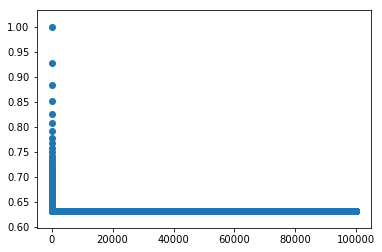

In [19]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x = np.linspace(1, 100001, 1000000)
y = 1 - (1 - 1/x)**x

plt.scatter(x, y)

The plot quickly reaches an asymptote of about 63.2%  

**2 (h)**:  

In [20]:
from sklearn.utils import resample

n = 100
obs = np.arange(1, n+1)
counter = 0
for i in range(10000):
    obs_rs = resample(obs)
    if 4 in obs_rs:
        counter += 1
print('{:.2f}%'.format(counter / 10000 * 100))

63.75%


This is very close to the results above. With more iterations of the loop, it would be even closer.

**3 (a)**:  
$k$-fold cross-validation works by taking $k$ random, non-overlapping splits, or folds, of the $n$ observations. The first fold serves as the validation set, while the remaining $k-1$ splits are used to fit the statistical learning method. The mean squared error is then computed for the validation set. This procedure is repeated $k$ times. The test error rate is estimated by averaging the $k$ resulting MSE estimates.  

**3 (b)**:  

 **i.** $k$-fold CV has less variance but more bias than validation CV  
 
 **ii.** $k$-fold has more variance but less bias than LOOCV

**4**:  
We can use the bootstrap method to sample with replacement from our dataset and estimate the $Y$'s from each sample. With the results of different $\widehat{Y}$'s, we can then estimate the standard deviation of our prediction.

## Applied

**5 (a)**

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

default = pd.read_csv('../../data/Default.csv', index_col=0)

X = default[['balance', 'income']].values
y = default['default'].values

In [22]:
logit = LogisticRegression()
logit.fit(X, y)
y_pred = logit.predict(X)

**5 (b)**:

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5000, random_state=420)

logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)

print('Test error rate: {:.2f}%'.format((y_pred != y_test).sum() / len(y_test) * 100))

Test error rate: 3.28%


**5 (c)**:

In [24]:
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5000, random_state=i)
    logit.fit(X_train, y_train)
    y_pred = logit.predict(X_test)
    print('Test error rate {}: {:.2f}%'.format(i, (y_pred != y_test).sum() / len(y_test) * 100))

Test error rate 0: 3.76%
Test error rate 1: 3.22%
Test error rate 2: 3.12%


The test error rate predictions are all similar to the actual default rate of 3.33% but shows some variance on either side of the actual default rate.

**5 (d)**:  

In [25]:
default2 = pd.get_dummies(default, drop_first=True)

X = default2[['balance', 'income', 'student_Yes']].values
y = default2['default_Yes']

logit.fit(X, y)
y_pred = logit.predict(X)

print('Test error rate: {:.2f}%'.format((y_pred != y).sum() / len(y) * 100))

Test error rate: 3.36%


Although this is very close to the true default rate in the data set, it's not clear whether this is an improvement for the model.

**6 (a)**:

In [50]:
default = pd.read_csv('../../data/Default.csv', index_col=0)
default2 = pd.get_dummies(default, drop_first=True)

smf.logit('default_Yes ~ balance + income', default2).fit().summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-11.5405,0.435,-26.544,0.000,-12.393,-10.688
balance,0.0056,0.000,24.835,0.000,0.005,0.006
income,2.081e-05,4.99e-06,4.174,0.000,1.1e-05,3.06e-05


**6 (b)**: 


In [57]:
import statsmodels.formula.api as smf

def boot(default):#, index):
    #default = default.iloc[index]
    logit = smf.logit('default_Yes ~ balance + income', default).fit(disp=0)
    return logit.params

**6 (c)**:

In [68]:
bal_coef = np.array([])
inc_coef = np.array([])
for i in range(100):
    params = boot(resample(default2))
    bal_coef = np.append(bal_coef, params['balance'])
    inc_coef = np.append(inc_coef, params['income'])

In [73]:
print('Balance:\n\tCoefficient: {:.4f}\n\tStd. Error: {:.4f}\n' \
      .format(bal_coef.mean(), bal_coef.std()))
print('Income:\n\tCoefficient: {:.4e}\n\tStd. Error: {:.4e}\n' \
      .format(inc_coef.mean(), inc_coef.std()))

Balance:
	Coefficient: 0.0056
	Std. Error: 0.0002

Income:
	Coefficient: 2.0693e-05
	Std. Error: 4.7433e-06



**6 (d)**:

The estimated standard errors obtained by the two methods are very close.

**7 (a)**:

In [124]:
weekly = pd.read_csv('../../data/Weekly.csv')
weekly2 = pd.get_dummies(weekly, drop_first=True)

X = weekly[['Lag1', 'Lag2']].values
y = weekly['Direction']

logit = LogisticRegression()
logit.fit(X, y)
print('Intercept: {}\nCoefficients: {}'.format(logit.intercept_, logit.coef_))

Intercept: [ 0.22039089]
Coefficients: [[-0.03867021  0.06022514]]


**7 (b)**:

In [136]:
index = list(range(len(weekly2)))

X_train, X_test = X[index[1:]], X[index[0]]
y_train, y_test = y[index[1:]], y[index[0]]

logit.fit(X_train, y_train)

Predicted: Up
Actual: Down


**7 (c)**:

In [137]:
y_pred = logit.predict(X_test.reshape(1, -1))

print('Predicted: {}\nActual: {}'.format(y_pred[0], y_test))

Predicted: Up
Actual: Down
